In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
 
import keras
from keras import models, layers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Import Data

 **Mount Google drive for better perfomance**

In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Scraped Images**

In [ ]:
images = glob.glob('/content/gdrive/MyDrive/Kaggle/Bilder_von_car4you_alle/*.jpg') # Daten von lokal importieren

**Extract Brand from image name**

In [ ]:
data = pd.DataFrame(images, columns=['src']) # kolumnen von source-pfad ableiten

data['brand'] = data['src'].apply(lambda x : x.split(',')[0].split("/")[-1]) # _ als kolumnen split anerkennen etc. -> brand erkennen

data['brand'].value_counts().head(20) # Anzahl der car images pro brand ausgeben

audi             500
vw               499
ford             499
toyota           475
volvo            469
bmw              445
nissan           373
honda            354
kia               71
mercedes-benz      5
Name: brand, dtype: int64

In [ ]:
data = data[(data['brand']=='audi')|(data['brand']=='ford')|(data['brand']=='vw')|(data['brand']=='toyota')|(data['brand']=='volvo')|(data['brand']=='bmw')|(data['brand']=='nissan')|(data['brand']=='honda')|(data['brand']=='kia')|(data['brand']=='mercedes-benz')].reset_index(drop=True)

data

,src,brand
0,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,ford
1,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,ford
2,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,ford
3,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,ford
4,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,ford
...,...,...
3685,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,honda
3686,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,honda
3687,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,honda
3688,/content/gdrive/MyDrive/Kaggle/Bilder_von_car4...,honda


# Feature engineering

**Change images to grey**

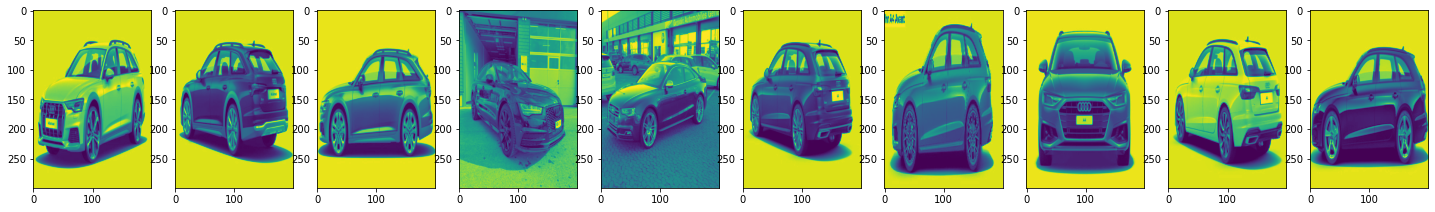

In [ ]:
X= []
y= []
for i in range(len(data)):
    src = data.loc[i,'src']
    src = cv2.imread(src, cv2.IMREAD_COLOR)
    dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    X.append(cv2.resize(dst, dsize=(200, 300), interpolation=cv2.INTER_AREA))
    y.append(data.loc[i,'brand'])
    
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X[i])

**Reshape array**

In [ ]:
X = np.array(X)
X = X.astype('float32')
X = X /255.0
X = X.reshape(-1,300,200,1)
y= np.array(pd.get_dummies(pd.DataFrame(y),columns=[0]))

X.shape, y.shape

((3692, 300, 200, 1), (3692, 10))

# Save array

**Save to numpy array for further use**

In [ ]:
np.save('/content/gdrive/MyDrive/Kaggle/ScaledImage/ScaldedImageCar4YouX', X)
np.save('/content/gdrive/MyDrive/Kaggle/ScaledImage/ScaldedImageCar4Youy', y)